### Import Modules

In [47]:
import pandas as pd
import numpy as np

from pandas import json_normalize
import json

from scipy.stats import describe

from skimage.segmentation import quickshift, mark_boundaries 
from skimage.draw import polygon, polygon_perimeter
from skimage import measure
from skimage import io

from matplotlib.patches import Circle, Polygon
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from ipywidgets import interact, fixed
from os import listdir

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Read data

In [48]:
# Read the geojson file
with open('dataset/SolarArrayPolygons.geojson') as f:
    json_file = json.load(f)

# Normalize the json file
df = json_normalize(json_file['features'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19433 entries, 0 to 19432
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   type                                     19433 non-null  object 
 1   properties.polygon_id                    19433 non-null  int64  
 2   properties.centroid_latitude             19433 non-null  float64
 3   properties.centroid_longitude            19433 non-null  float64
 4   properties.centroid_latitude_pixels      19433 non-null  float64
 5   properties.centroid_longitude_pixels     19433 non-null  float64
 6   properties.city                          19433 non-null  object 
 7   properties.area_pixels                   19433 non-null  float64
 8   properties.area_meters                   19433 non-null  float64
 9   properties.image_name                    19433 non-null  object 
 10  properties.nw_corner_of_image_latitude   19433

In [49]:
# Leave only the necessary columns
# polygon_id                   19863 non-null int64
# centroid_latitude_pixels     19861 non-null float64
# centroid_longitude_pixels    19861 non-null float64
# city                         19863 non-null object
# image_name                   19863 non-null object
# polygon_vertices             19863 non-null object

df = df[['properties.polygon_id', 'properties.centroid_latitude_pixels', 'properties.centroid_longitude_pixels', 'properties.city', 'properties.image_name', 'properties.polygon_vertices_pixels']]

# Rename the columns
df.columns = ['polygon_id', 'centroid_latitude_pixels', 'centroid_longitude_pixels', 'city', 'image_name', 'polygon_vertices']

df.head()

,polygon_id,centroid_latitude_pixels,centroid_longitude_pixels,city,image_name,polygon_vertices
0,1,107.618458,3286.151487,Fresno,11ska460890,"[[3360.495069, 131.631164], [3249.19771, 87.98..."
1,2,45.977659,3286.352946,Fresno,11ska460890,"[[3361.153846, 69.615385], [3217.615385, 12.84..."
2,3,22.280851,3303.465657,Fresno,11ska460890,"[[3358.015726, 48.136863], [3358.05, 48.15], [..."
3,4,2048.362567,2547.366116,Fresno,11ska460890,"[[2571.591716, 2068.04931], [2571.021266, 2067..."
4,5,2060.014890,2529.504997,Fresno,11ska460890,"[[2563.781065, 2091.398422], [2504.416174, 202..."


In [50]:
# Count of array annotations and satellite images for each city in the dataset
df['city'].value_counts()

city
Fresno      14710
Stockton     2546
Oxnard       1595
Modesto       582
Name: count, dtype: int64

In [54]:
city_data = df[df['city'] == 'Fresno']

# Count number of occurences per image_name
city_data['image_name'].value_counts()

image_name
11ska535860    350
11ska565815    309
11ska610755    266
11ska535845    264
11ska595680    255
              ... 
11ska370800      1
11ska565635      1
11ska490620      1
11ska460635      1
11ska340845      1
Name: count, Length: 310, dtype: int64

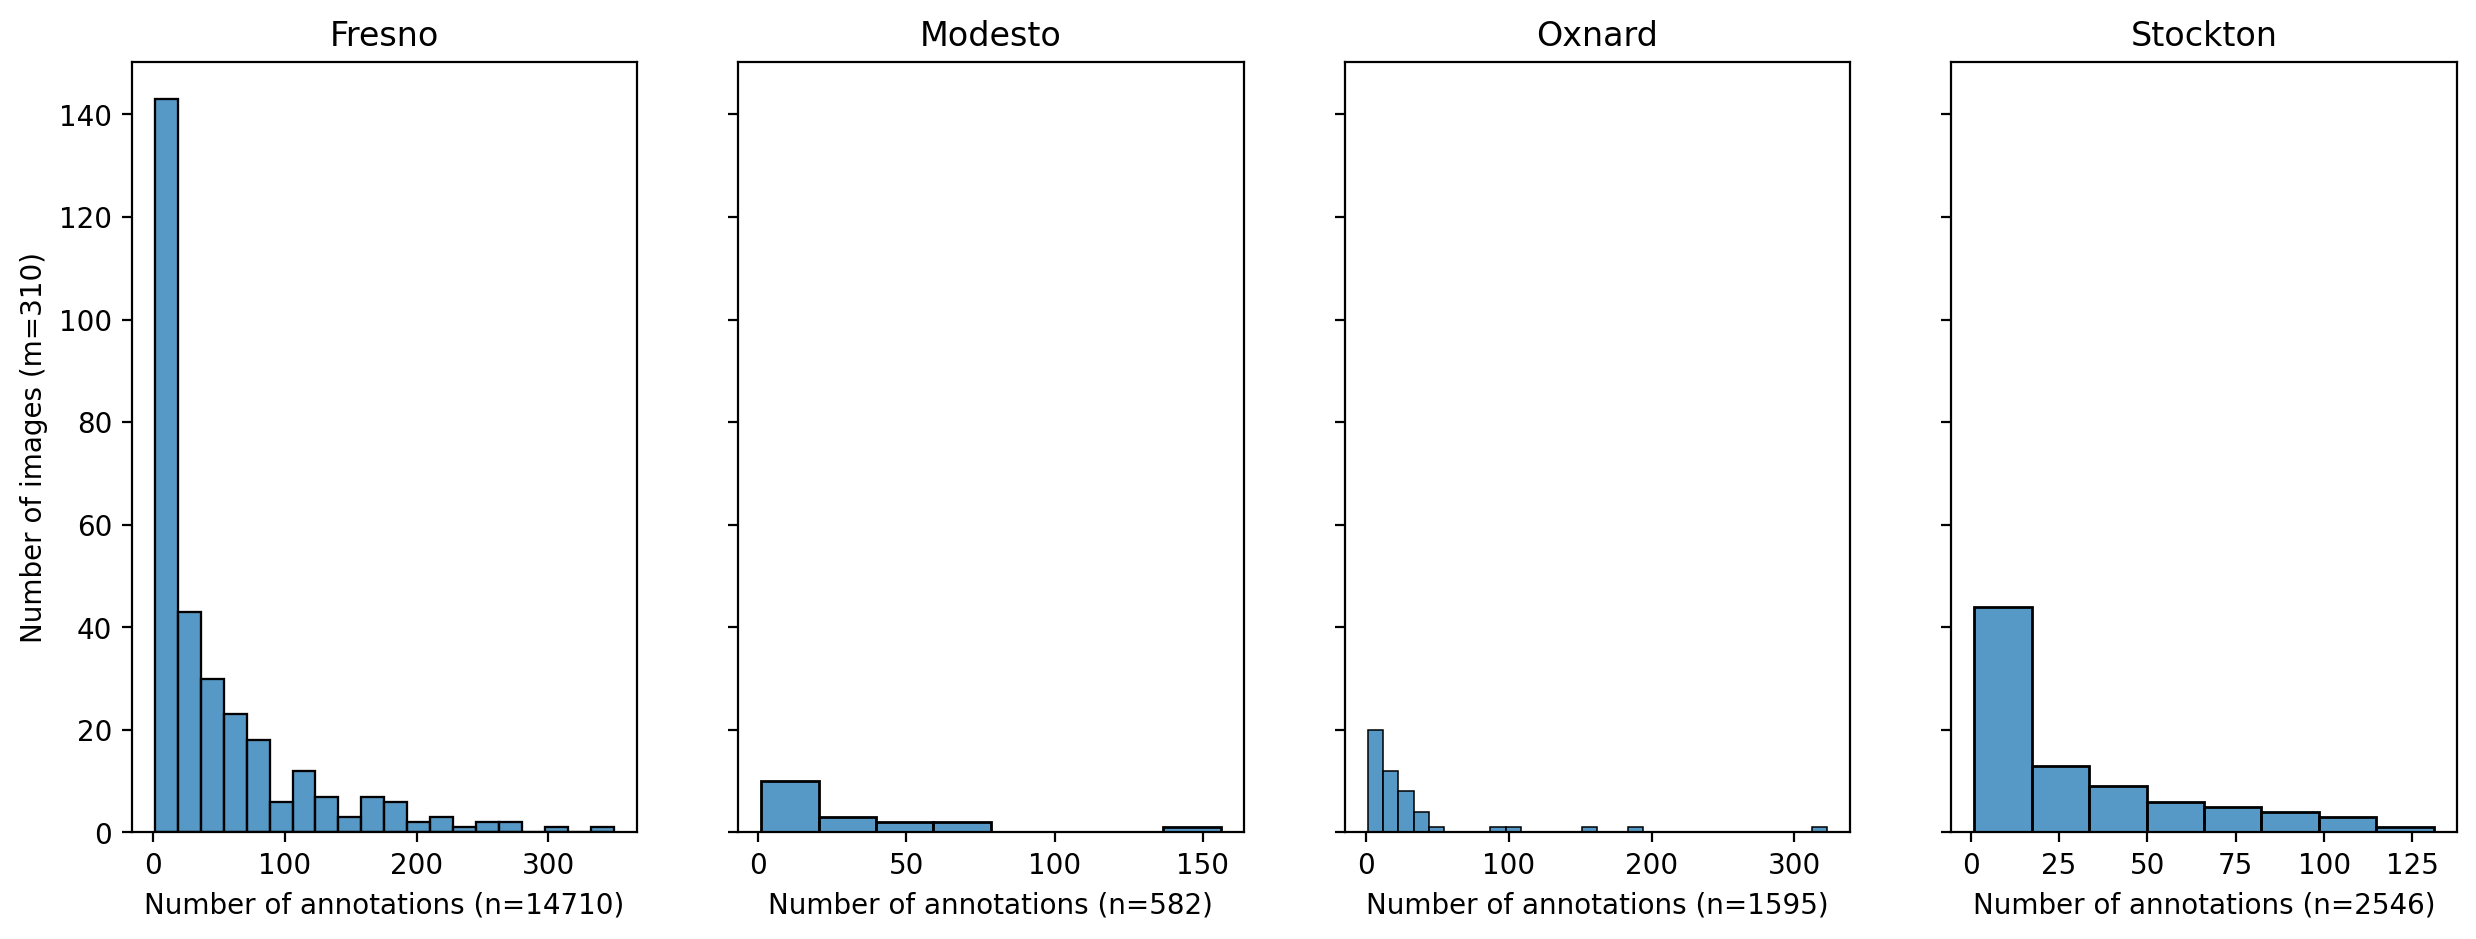

In [66]:
# Plot in multiple histograms per city name
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

for i, city in enumerate(df['city'].unique()):
    # Filter data for the current city
    city_data = df[df['city'] == city]
    
    # y-axis is the number of annotations per image_name
    y_axis_data = city_data['image_name'].value_counts().values
    
    # Use Seaborn's histplot to create the histogram
    sns.histplot(y_axis_data, kde=False, ax=ax[i])
    
    ax[i].set_title(city)
    ax[i].set_xlabel(f'Number of annotations (n={city_data.shape[0]})')
    ax[i].set_ylabel(f'Number of images (m={len(y_axis_data)})')
    
plt.show()
    